In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# from https://github.com/solevillar/scGeneFit-python
from scGeneFit.functions import *

# Import data
[X, Y, names]= load_example_data("zeisel")
N,d=X.shape
print(X.shape, Y.shape)
Y=Y-1 # to start from 0

print('nb classes level 0:',len(np.unique(Y[0])))
#print('nb classes level 1:',len(np.unique(Y[1])))

(3005, 4000) (2, 3005)
nb classes level 0: 7


In [3]:
for i in range(len(np.unique(Y[0]))):
    c= np.sum(Y[0]==i)
    print('class %d: %d' % (i, c))

class 0: 224
class 1: 235
class 2: 290
class 3: 98
class 4: 820
class 5: 939
class 6: 399


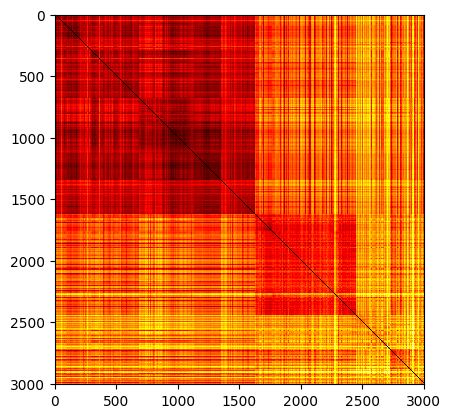

In [4]:
import torch
import torch.nn.functional as F

def cosine_distance_matrix(X):
    X_normalized = F.normalize(X, p=2, dim=1)
    cosine_similarity = torch.mm(X_normalized, X_normalized.t())
    return 1 - cosine_similarity


X_torch = torch.from_numpy(X)
distance = cosine_distance_matrix(X_torch).numpy()
distance[distance < 0] = 0

plt.imshow(distance, cmap='hot', interpolation='nearest')

In [6]:
from sklearn.cluster import AgglomerativeClustering

#clustering = AgglomerativeClustering(metric="cosine",linkage='complete',n_clusters=7).fit(X)
clustering = AgglomerativeClustering(n_clusters=13).fit(X)

labels = clustering.labels_

from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(Y[0], clustering.labels_)
print('Adjusted Rank Index',ari)


Adjusted Rank Index 0.3361713022509855


In [ ]:
import openTSNE
tsne = openTSNE.TSNE(perplexity=10,metric="precomputed",random_state=42)
embedding = tsne.fit(distance)

Attempting to use `pca` initalization, but using precomputed distance matrix! Using `spectral` initilization instead, which doesn't need access to the data matrix.


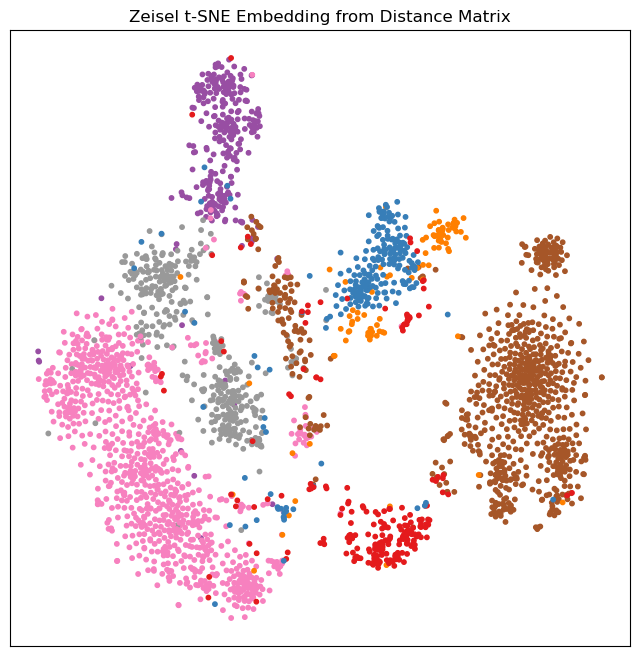

In [ ]:
# Plot the embedding
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1],c=Y[0],s=10,cmap='Set1')
plt.title("Zeisel t-SNE Embedding from Distance Matrix")
plt.xticks([])
plt.yticks([])
plt.show()